In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from word2number import w2n

import scipy.stats as stat
import pylab

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectKBest, f_regression            ## Feature Engineering
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [2]:
df= pd.read_excel(r'D:\PYTHON Practice Projecs\Titanc_naive_Bayes.xlsx',usecols= ['Sex','Embarked','Pclass','Survived'])

In [3]:
df

,Pclass,Sex,Embarked,Survived
0,3,male,S,0
1,1,female,C,1
2,3,female,S,1
3,1,female,S,1
4,3,male,S,0
...,...,...,...,...
886,2,male,S,0
887,1,female,S,1
888,3,female,S,0
889,1,male,C,1


In [4]:
le = LabelEncoder()
df['Embarked'] = le.fit_transform(df['Embarked'])
df['Sex'] = le.fit_transform(df['Sex'])

In [125]:
df

,Pclass,Sex,Embarked,Survived
0,3,1,2,0
1,1,0,0,1
2,3,0,2,1
3,1,0,2,1
4,3,1,2,0
...,...,...,...,...
886,2,1,2,0
887,1,0,2,1
888,3,0,2,0
889,1,1,0,1


In [87]:
891*.75


668.25

In [53]:
df.shape

(891, 4)

In [49]:
x = df[['Sex','Embarked','Pclass']]

In [50]:
## Target feature
y = df[['Survived']]  

In [86]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [88]:
x_train

,Sex,Embarked,Pclass
531,1,0,3
413,1,2,2
281,1,2,3
39,0,0,3
562,1,2,2
...,...,...,...
250,1,2,3
825,1,1,3
605,1,2,3
79,0,2,3


======================================================

## Performing Chi2 Test
- Returns 2 values >>> f_score & p values
- f_score needs to be higher >> more related the features are
- p_values the lesser the value the more important that feature is

In [90]:
## chi2 Test ------ 1
f_p_values = chi2(x_train,y_train)

In [91]:
f_p_values ## first row >> f score, second row >> pvalue

(array([87.59975966,  7.21808954, 20.85822587]),
 array([8.01343801e-21, 7.21724815e-03, 4.94563710e-06]))

In [97]:
f_score = pd.Series(f_p_values[0])
f_score.index = x_train.columns
f_score.sort_values(ascending=False)

Sex         87.599760
Pclass      20.858226
Embarked     7.218090
dtype: float64

In [95]:
p_values = pd.Series(f_p_values[1])
p_values.index = x_train.columns
p_values.sort_values(ascending = True)

Sex         8.013438e-21
Pclass      4.945637e-06
Embarked    7.217248e-03
dtype: float64

## Observation
Sex is the most imp feature as compared to target feature ('Survived') 
- least p value
- largest f_score

=============================================================================================

## TRAIN TEST SPLIT is done to avoid overfitting
- That is, the model might learn an overly specific function that performs well on your training data, but does not generalize to images it has never seen.




In [98]:
df1 = pd.read_excel(r'D:\PYTHON Practice Projecs\Car_price.xlsx')

In [99]:
df1.head(3)

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100


In [100]:
df1.columns

Index(['Mileage', 'Age(yrs)', 'Sell Price($)'], dtype='object')

In [104]:
20*0.8

16.0

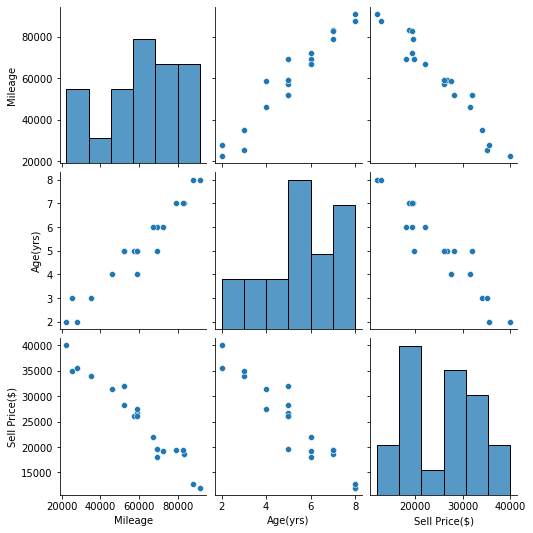

In [17]:
sns.pairplot(df1[['Mileage', 'Age(yrs)', 'Sell Price($)']])

In [128]:
x_train

,Mileage,Age(yrs)
11,79000,7
16,28000,2
3,22500,2
5,59000,5
15,25400,3
17,69000,5
7,72000,6
19,52000,5
0,69000,6
9,67000,6


========================================================================================================

# CHI2 TEST
A chi-square test is used in statistics to test the independence of two events
Higher the Chi-Square value the feature is more dependent on the response and it can be selected for model training

### Limtations>>

- Large numbers of labels (20 or more) in the independent or dependent features
- Chi-Square Test of Independence can only compare categorical variables

In [101]:
x= df1[['Mileage', 'Age(yrs)']]
y= df1[['Sell Price($)']]

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)  ## random_state =10>> keeps the sample constant 

In [107]:
## chi2 Test --------2
f_p_values_ = chi2(x_train,y_train)

In [108]:
f_p_values_

(array([1.21798362e+05, 1.08780488e+01]), array([0.       , 0.7611904]))

In [111]:
f_score = pd.Series(f_p_values_[0])
f_score.index = x_train.columns
f_score.sort_values(ascending=False)

Mileage     121798.362026
Age(yrs)        10.878049
dtype: float64

In [112]:
p_values = pd.Series(f_p_values_[1])
p_values.index = x_train.columns
p_values.sort_values(ascending=True)

Mileage     0.00000
Age(yrs)    0.76119
dtype: float64

### Observations : Mileage is the most imp feature as compared to target variable (Sell Price($))
- most f_score
- least p_value  

===================================================================================================================

In [120]:
## linear reg
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)


LinearRegression()

In [121]:
reg.predict(x_test)

array([[16370.67985435],
       [25617.90013735],
       [29746.6117008 ],
       [27052.38876937]])

In [122]:
y_test

,Sell Price($)
14,19400
2,26100
4,31500
6,32000


In [123]:
reg.score(x_test,y_test)

0.6431164599822581

## New Project

In [130]:
df2 = pd.read_csv(r'D:\PYTHON Practice Projecs\500_Person_Gender_Height_Weight_Index.csv')

In [139]:
df2.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [138]:
le = LabelEncoder()
df2['Gender'] = le.fit_transform(df2['Gender'])

In [140]:
x = df2.iloc[:,:3]

In [147]:
500*.2


100.0

In [142]:
y = df2.iloc[:,-1]

In [149]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [150]:
# Chi2 Test 
f_p_values2 = chi2(x_train,y_train)

f_score = pd.Series(f_p_values2[0])
f_score.index = x_train.columns




In [151]:
f_p_values2

(array([1.84886783e+00, 1.33669966e+02, 2.62896192e+03]),
 array([8.69636811e-01, 3.95835955e-27, 0.00000000e+00]))

In [154]:
f_score = pd.Series(f_p_values2[0])
f_score.index = x_train.columns
f_score.sort_values(ascending=False )

Weight    2628.961916
Height     133.669966
Gender       1.848868
dtype: float64

In [156]:
p_values = pd.Series(f_p_values2[1])
p_values.index = x_train.columns
p_values.sort_values(ascending=True)

Weight    0.000000e+00
Height    3.958360e-27
Gender    8.696368e-01
dtype: float64

## Observation >> wt is the most imp feature as compared to Index